In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
# 1. Завантажити набір даних. 
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# 2. Розділити дані на тренувальний та тестовий набори. 
x = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [4]:
# 3. Застосувати випадковий ліс для визначення важливих ознак. 
svm= SVC(kernel='linear')
svm.fit(X_train, y_train)

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
feature_importances_rf = rf.feature_importances_
print(feature_importances_rf)

[0.04870337 0.01359088 0.05326975 0.04755501 0.00728533 0.01394433
 0.06800084 0.10620999 0.00377029 0.00388577 0.02013892 0.00472399
 0.01130301 0.02240696 0.00427091 0.00525322 0.00938583 0.00351326
 0.00401842 0.00532146 0.07798688 0.02174901 0.06711483 0.15389236
 0.01064421 0.02026604 0.0318016  0.14466327 0.01012018 0.00521012]


In [6]:
signs_rf = np.argsort(feature_importances_rf)[::-1]
print(signs_rf)

[23 27  7 20  6 22  2  0  3 26 13 21 25 10  5  1 12 24 28 16  4 19 15 29
 11 14 18  9  8 17]


In [7]:
svm_coeff = np.abs(svm.coef_[0])
signs_svm = np.argsort(svm_coeff)[::-1]
print(signs_svm)

[26 11  0 28 25  6 27 24  7  8 21  5  4  2 29 10 20  1 16 13 15 17 18 14
  9 22 19 12 23  3]


Text(0, 0.5, 'Важливість')

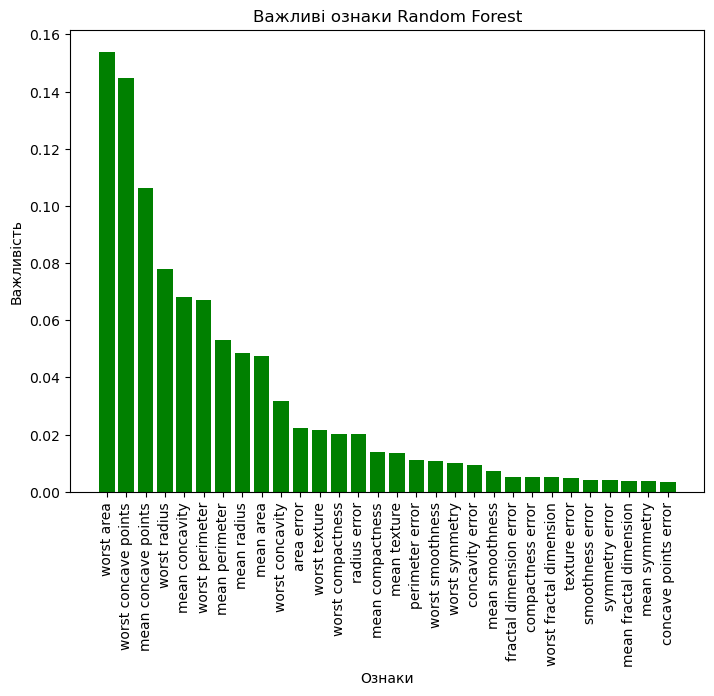

In [8]:
# 4. Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі. 
plt.figure(figsize = (18, 6))
plt.subplot(1,2,1)
plt.title('Важливі ознаки Random Forest')
plt.bar(range(X_train.shape[1]), feature_importances_rf[signs_rf], align = "center", color='green')
plt.xticks(range(X_train.shape[1]), cancer.feature_names[signs_rf], rotation = 90)
plt.xlabel('Ознаки')
plt.ylabel('Важливість')

Text(0, 0.5, 'Важливість')

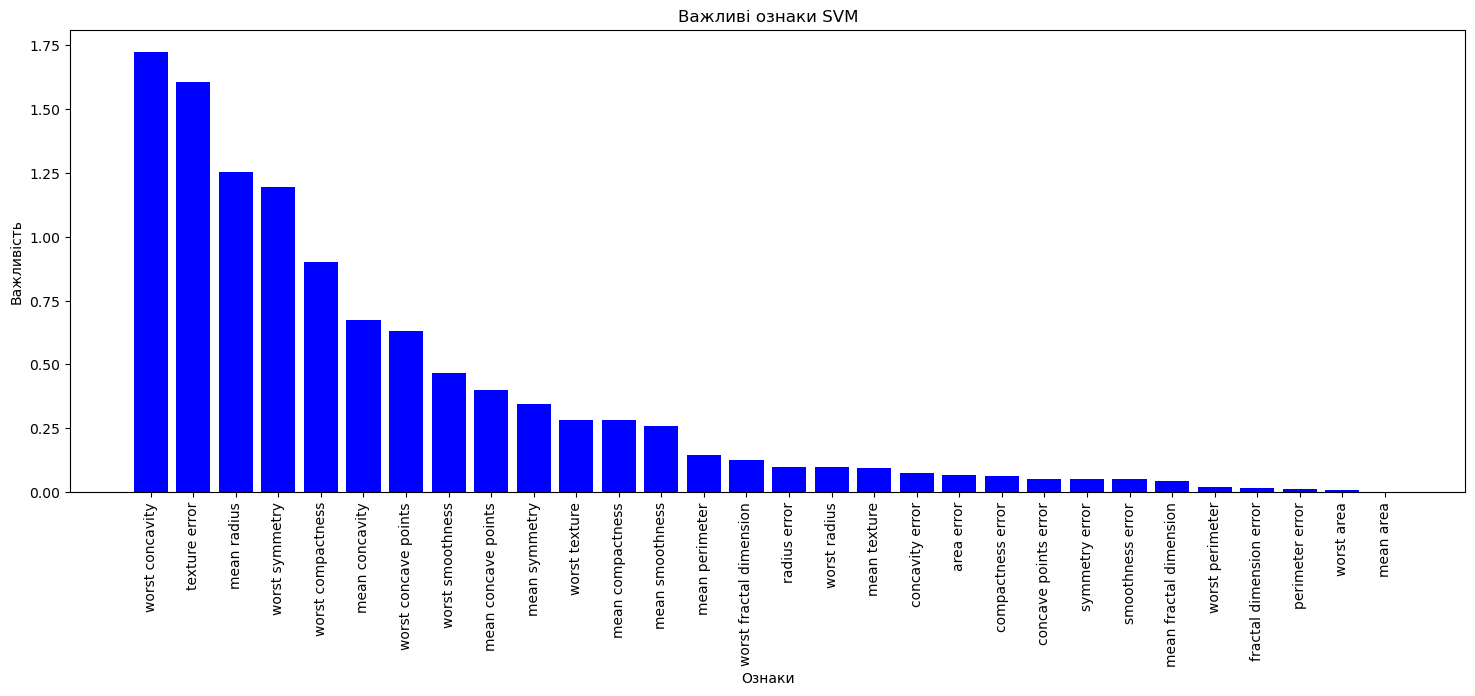

In [15]:
# 5. Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані
plt.figure(figsize = (18, 6))
plt.title('Важливі ознаки SVM')
plt.bar(range(X_train.shape[1]), svm_coeff[signs_svm], align = "center", color='blue')
plt.xticks(range(X_train.shape[1]), cancer.feature_names[signs_svm ], rotation = 90)
plt.xlabel('Ознаки')
plt.ylabel('Важливість')

In [10]:
# 6. Обчислити точність для двох алгоритмів і порівняти результати 
svm_pred = svm.predict(X_test)
svm_accur = accuracy_score(y_test, svm_pred)
rf_pred = rf.predict(X_test)
rf_accur = accuracy_score(y_test, rf_pred)
print('Точність SVM = ', svm_accur)
print('Точність RandomForest  = ', rf_accur)
if svm_accur > rf_accur:
    print('SVM ефективніший')
elif svm_accur < rf_accur:
    print('Random Forest  ефективніший')
else:
    print('Точність однакова')

Точність SVM =  0.956140350877193
Точність RandomForest  =  0.9649122807017544
Random Forest  ефективніший


Розділили дані на тренувальний та тестовий набори.
Створили класифікатор Support Vector Machine (SVM) із лінійним ядром і підлаштовуємо його під навчальні дані.
Random Forest показав більшу точність ніж SVM для датасету.